In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully.")
    print("Dataset shape:", df.shape)
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please upload the dataset or mount your Drive.")
    exit()

print("\nDataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum().max())

Dataset loaded successfully.
Dataset shape: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


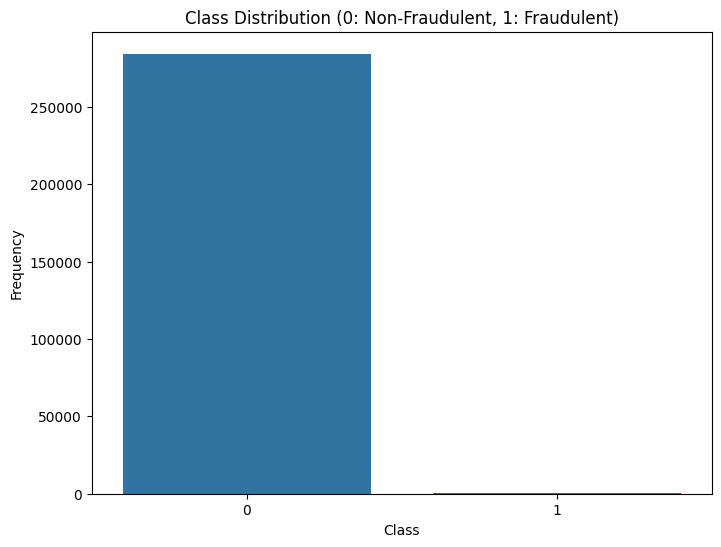


Percentage of Fraudulent Transactions: 0.1727%
The dataset is highly imbalanced.


In [ ]:
print("\nClass Distribution:")
class_counts = df['Class'].value_counts()
print(class_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

print(f"\nPercentage of Fraudulent Transactions: {class_counts[1] / len(df) * 100:.4f}%")
print("The dataset is highly imbalanced.")


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


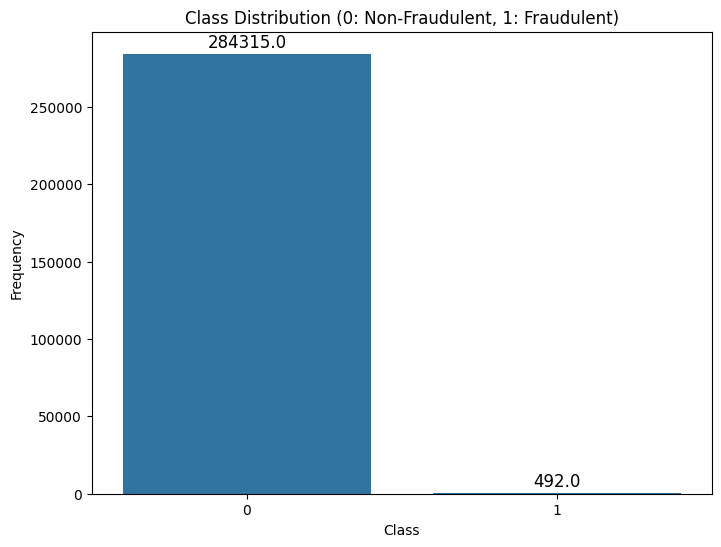


Percentage of Fraudulent Transactions: 0.1727%
The dataset is highly imbalanced.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nClass Distribution:")
class_counts = df['Class'].value_counts()
print(class_counts)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 8), textcoords='offset points')

plt.show()

print(f"\nPercentage of Fraudulent Transactions: {class_counts[1] / len(df) * 100:.4f}%")
print("The dataset is highly imbalanced.")


In [ ]:
# Generate a statistical summary of the DataFrame
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isna().sum()* 100 / len(df)


,0
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


In [ ]:
df.dropna(inplace=True)


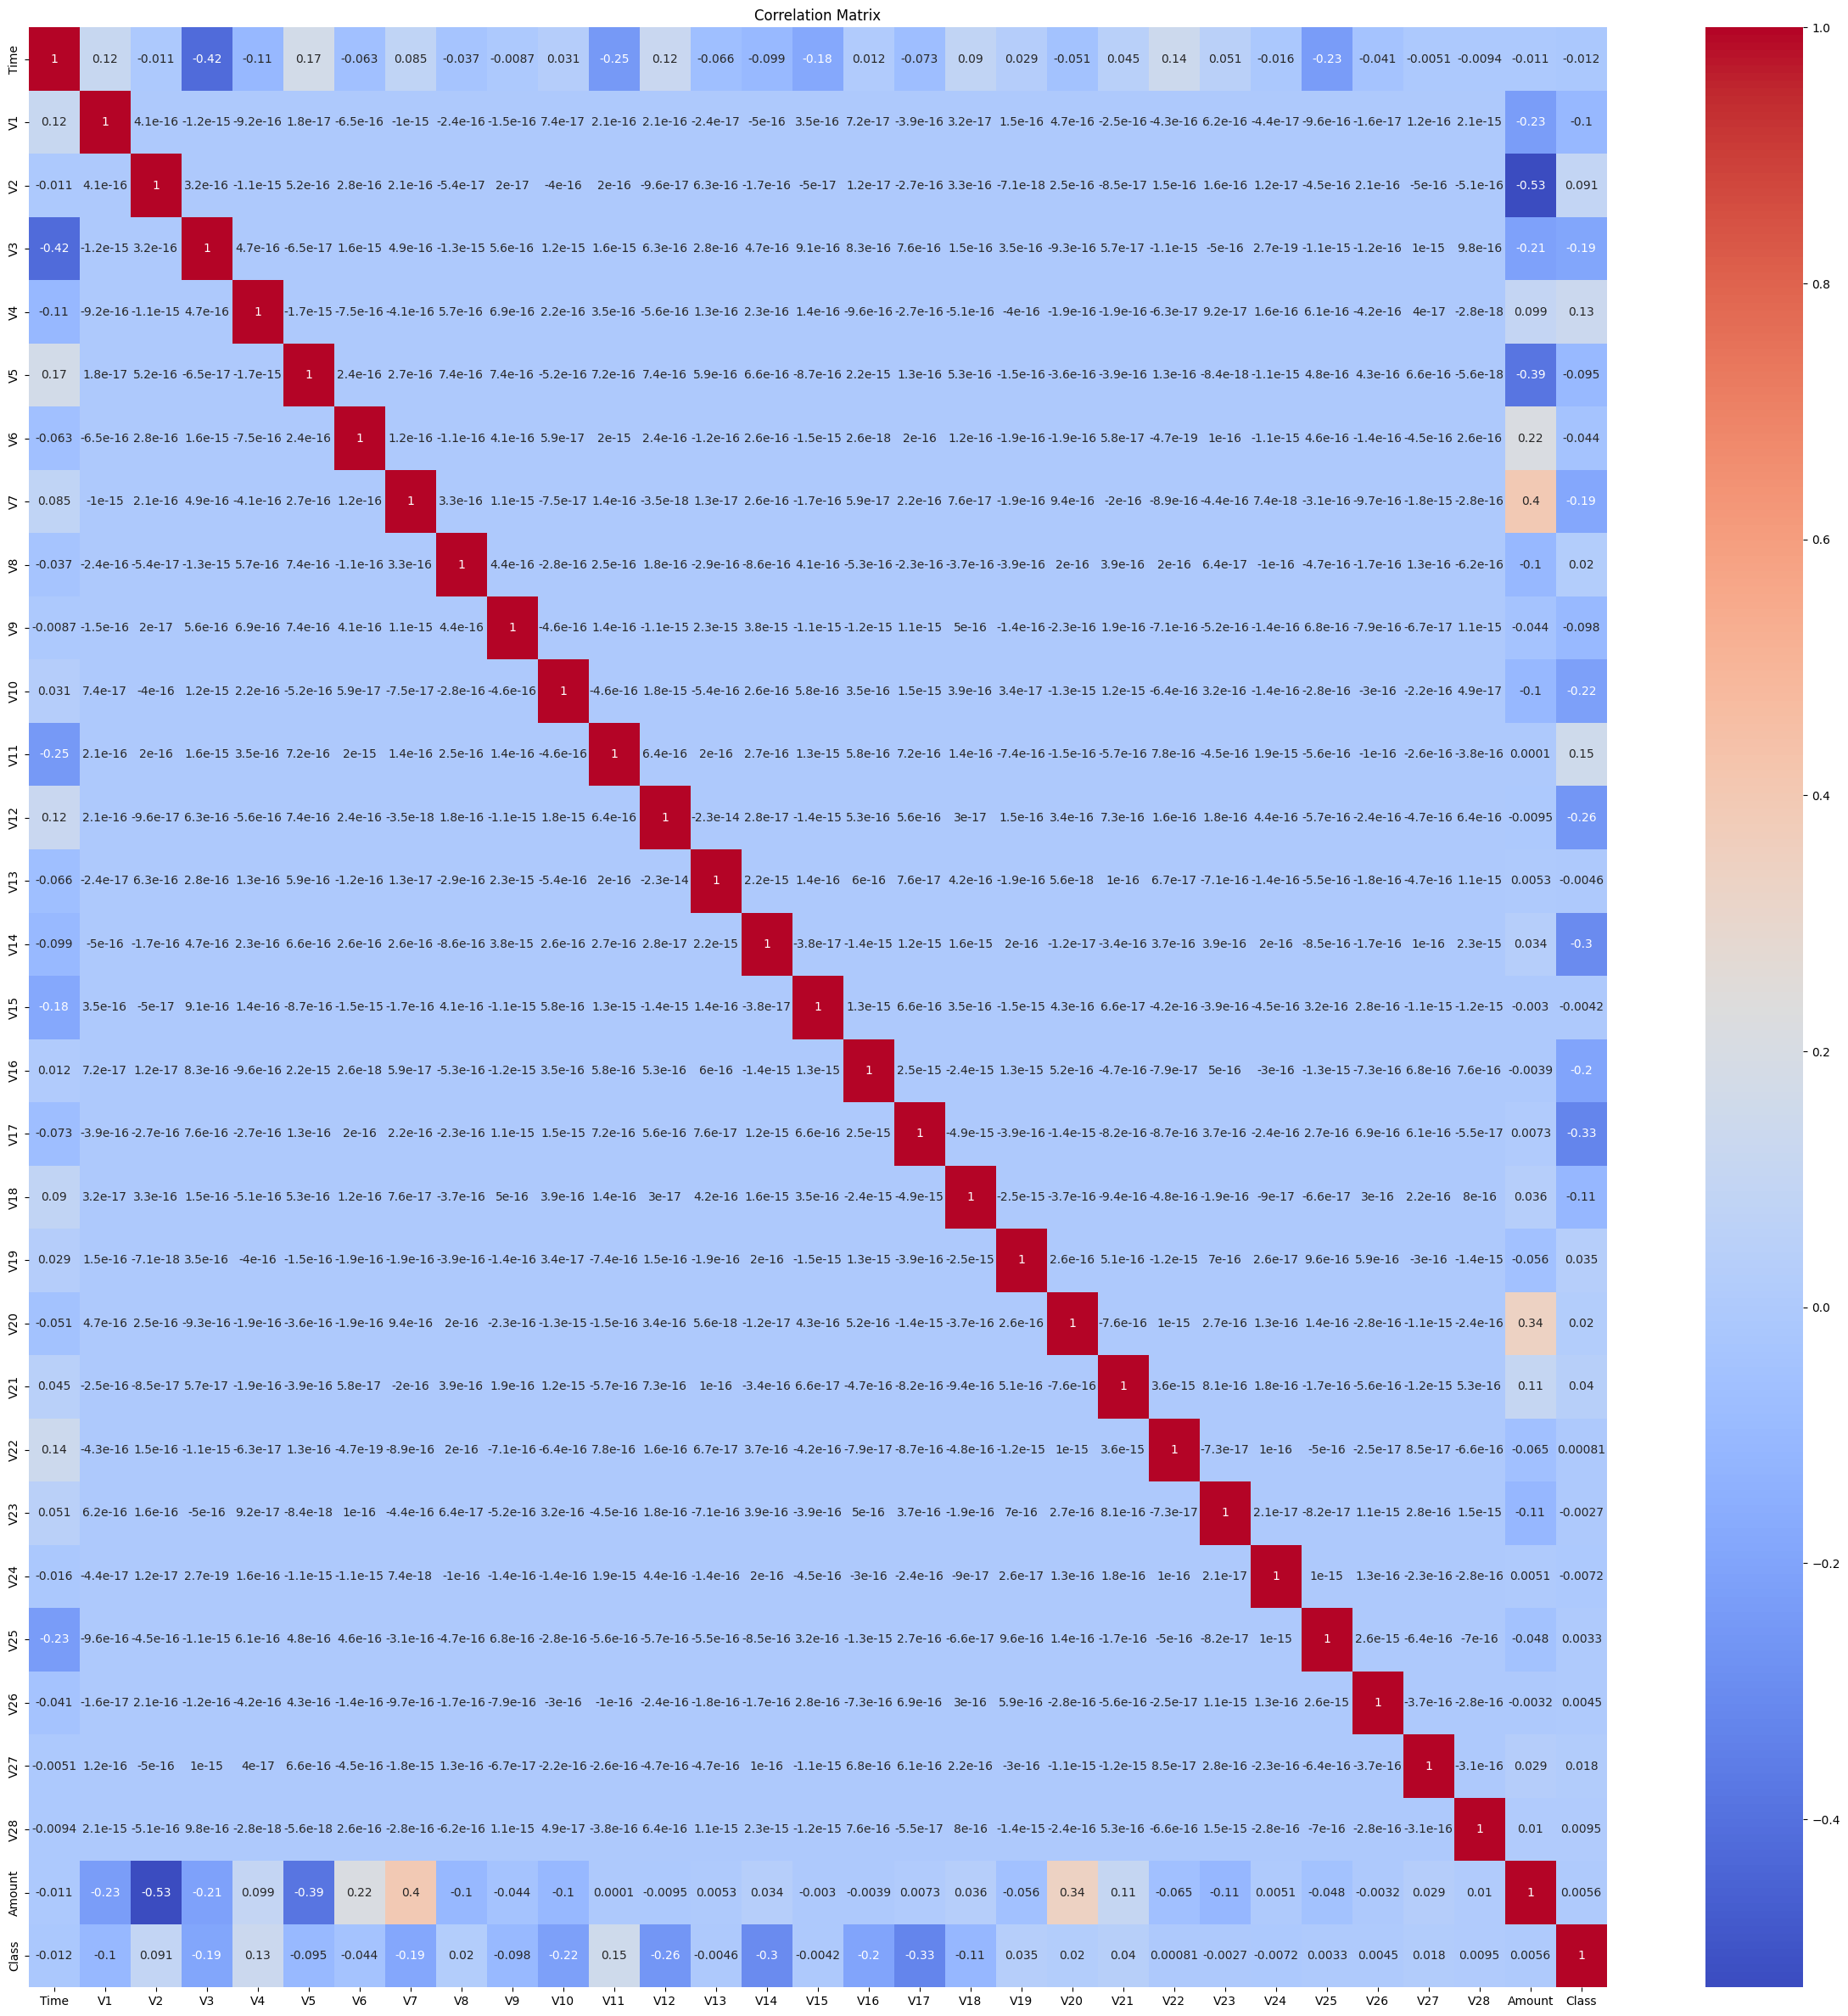

In [ ]:


correlation_matrix = df.corr()

plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Split data (do this BEFORE scaling!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check split stats
print("\nData Splitting:")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))



Data Splitting:
Shape of X_train: (227845, 30)
Shape of X_test: (56962, 30)
Shape of y_train: (227845,)
Shape of y_test: (56962,)

Class distribution in y_train:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Class distribution in y_test:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

#  scalers
scaler_amount = StandardScaler()
scaler_time = StandardScaler()

X_train['scaled_Amount'] = scaler_amount.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['scaled_Amount'] = scaler_amount.transform(X_test['Amount'].values.reshape(-1, 1))

X_train['scaled_Time'] = scaler_time.fit_transform(X_train['Time'].values.reshape(-1, 1))
X_test['scaled_Time'] = scaler_time.transform(X_test['Time'].values.reshape(-1, 1))

X_train.drop(['Time', 'Amount'], axis=1, inplace=True)
X_test.drop(['Time', 'Amount'], axis=1, inplace=True)

cols = X_train.columns.tolist()
cols = [col for col in cols if col not in ['scaled_Amount', 'scaled_Time']]
cols += ['scaled_Amount', 'scaled_Time']

X_train = X_train[cols]
X_test = X_test[cols]

print("\nDataset after scaling:")
(X_train.head())



Dataset after scaling:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_Amount,scaled_Time
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494,1.411588
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764,0.623141
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693,-1.130680
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360,0.794699
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281,-0.748102


In [ ]:

print("\n--- Training on Original Unbalanced Data ---")
model_orig = LogisticRegression(random_state=42, max_iter=1000)
model_orig.fit(X_train, y_train)


y_pred_orig = model_orig.predict(X_test)

print("\nEvaluation Metrics (Original Data):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_orig))
print("\nClassification Report:\n", classification_report(y_test, y_pred_orig, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_orig):.4f}")
print(f"Precision (Fraud): {precision_score(y_test, y_pred_orig):.4f}")
print(f"Recall (Fraud): {recall_score(y_test, y_pred_orig):.4f}")
print(f"F1-Score (Fraud): {f1_score(y_test, y_pred_orig):.4f}")


--- Training on Original Unbalanced Data ---

Evaluation Metrics (Original Data):
Confusion Matrix:
 [[56851    13]
 [   35    63]]

Classification Report:
                precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.83      0.64      0.72        98

     accuracy                           1.00     56962
    macro avg       0.91      0.82      0.86     56962
 weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9992
Precision (Fraud): 0.8289
Recall (Fraud): 0.6429
F1-Score (Fraud): 0.7241


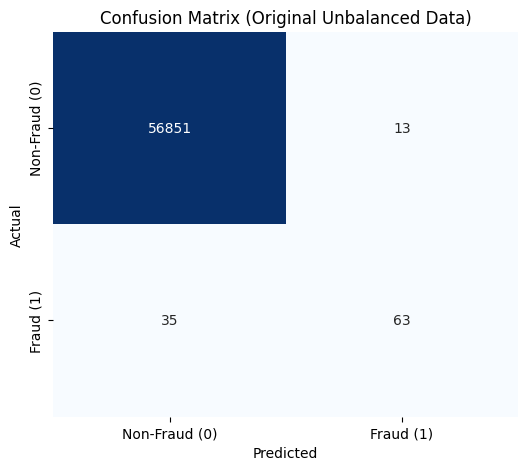

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm_orig = confusion_matrix(y_test, y_pred_orig)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'], cbar=False)
plt.title(f"Confusion Matrix (Original Unbalanced Data)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:

print("\n--- Applying Random Oversampling ---")
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled (ROS) training set shape:", X_train_ros.shape)
print("\nClass distribution in resampled (ROS) y_train:")
print(pd.Series(y_train_ros).value_counts())


model_ros = LogisticRegression(random_state=42, max_iter=1000)
model_ros.fit(X_train_ros, y_train_ros)


y_pred_ros = model_ros.predict(X_test)
print("\nEvaluation Metrics (Random Oversampling):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ros))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ros, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_ros):.4f}")
print(f"Precision (Fraud): {precision_score(y_test, y_pred_ros):.4f}")
print(f"Recall (Fraud): {recall_score(y_test, y_pred_ros):.4f}")
print(f"F1-Score (Fraud): {f1_score(y_test, y_pred_ros):.4f}")


--- Applying Random Oversampling ---
Original training set shape: (227845, 30)
Resampled (ROS) training set shape: (454902, 30)

Class distribution in resampled (ROS) y_train:
Class
0    227451
1    227451
Name: count, dtype: int64

Evaluation Metrics (Random Oversampling):
Confusion Matrix:
 [[55479  1385]
 [    8    90]]

Classification Report:
                precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.98      0.99     56864
    Fraud (1)       0.06      0.92      0.11        98

     accuracy                           0.98     56962
    macro avg       0.53      0.95      0.55     56962
 weighted avg       1.00      0.98      0.99     56962

Accuracy: 0.9755
Precision (Fraud): 0.0610
Recall (Fraud): 0.9184
F1-Score (Fraud): 0.1144


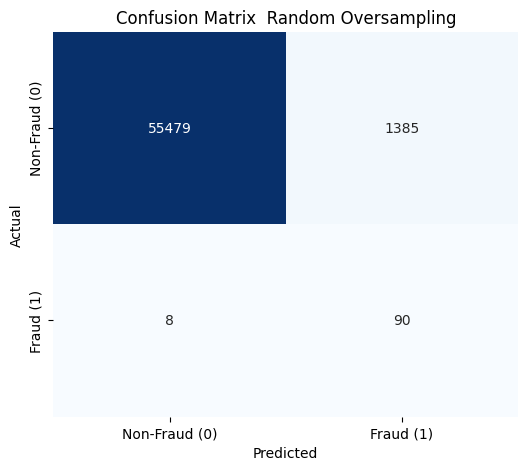

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_ros = confusion_matrix(y_test, y_pred_ros)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_ros, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'], cbar=False)
plt.title(f"Confusion Matrix  Random Oversampling")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score,
    recall_score, f1_score
)

print("\n--- Applying Random Under Sampling (RUS) ---")
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled (RUS) training set shape:", X_train_rus.shape)
print("\nClass distribution in resampled (RUS) y_train:")
print(pd.Series(y_train_rus).value_counts())

# Train logistic regression model
model_rus = LogisticRegression(random_state=42, max_iter=1000)
model_rus.fit(X_train_rus, y_train_rus)

# Predict on the original test set
y_pred_rus = model_rus.predict(X_test)

# Evaluation
print("\nEvaluation Metrics (RUS):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rus))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rus, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rus):.4f}")
print(f"Precision (Fraud): {precision_score(y_test, y_pred_rus):.4f}")
print(f"Recall (Fraud): {recall_score(y_test, y_pred_rus):.4f}")
print(f"F1-Score (Fraud): {f1_score(y_test, y_pred_rus):.4f}")



--- Applying Random Under Sampling (RUS) ---
Original training set shape: (227845, 30)
Resampled (RUS) training set shape: (788, 30)

Class distribution in resampled (RUS) y_train:
Class
0    394
1    394
Name: count, dtype: int64

Evaluation Metrics (RUS):
Confusion Matrix:
 [[54612  2252]
 [    8    90]]

Classification Report:
                precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.96      0.98     56864
    Fraud (1)       0.04      0.92      0.07        98

     accuracy                           0.96     56962
    macro avg       0.52      0.94      0.53     56962
 weighted avg       1.00      0.96      0.98     56962

Accuracy: 0.9603
Precision (Fraud): 0.0384
Recall (Fraud): 0.9184
F1-Score (Fraud): 0.0738


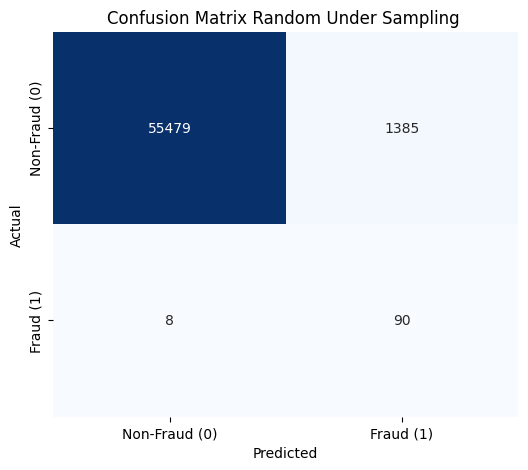

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_ros are already defined from your model

# Calculate confusion matrix
cm_ros = confusion_matrix(y_test, y_pred_ros)

# Create a colored confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ros, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'], cbar=False)
plt.title(f"Confusion Matrix Random Under Sampling ")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
print("\n--- Applying SMOTE ---")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled (SMOTE) training set shape:", X_train_smote.shape)
print("\nClass distribution in resampled (SMOTE) y_train:")
print(pd.Series(y_train_smote).value_counts())

model_smote = LogisticRegression(random_state=42, max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)
print("\nEvaluation Metrics (SMOTE):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"Precision (Fraud): {precision_score(y_test, y_pred_smote):.4f}")
print(f"Recall (Fraud): {recall_score(y_test, y_pred_smote):.4f}")
print(f"F1-Score (Fraud): {f1_score(y_test, y_pred_smote):.4f}")


--- Applying SMOTE ---
Original training set shape: (227845, 30)
Resampled (SMOTE) training set shape: (454902, 30)

Class distribution in resampled (SMOTE) y_train:
Class
0    227451
1    227451
Name: count, dtype: int64

Evaluation Metrics (SMOTE):
Confusion Matrix:
 [[55403  1461]
 [    8    90]]

Classification Report:
                precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.97      0.99     56864
    Fraud (1)       0.06      0.92      0.11        98

     accuracy                           0.97     56962
    macro avg       0.53      0.95      0.55     56962
 weighted avg       1.00      0.97      0.99     56962

Accuracy: 0.9742
Precision (Fraud): 0.0580
Recall (Fraud): 0.9184
F1-Score (Fraud): 0.1092


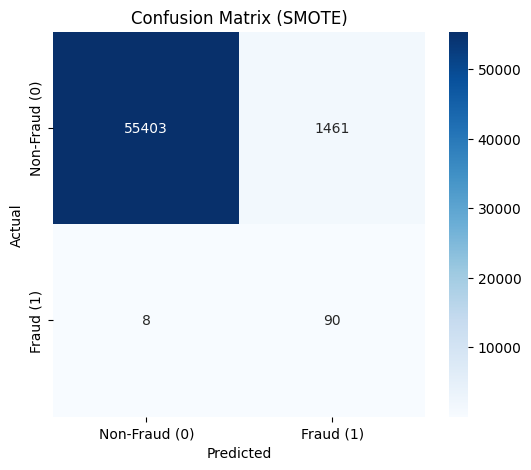

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:

print("\n===  Class Weights ===")

# Apply class_weight='balanced'
model_weighted = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model_weighted.fit(X_train, y_train)

# Predict
y_pred_weighted = model_weighted.predict(X_test)

# Evaluation
print("\n--- Evaluation (Class Weights) ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_weighted, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")
print(f"Precision (Fraud): {precision_score(y_test, y_pred_weighted):.4f}")
print(f"Recall (Fraud): {recall_score(y_test, y_pred_weighted):.4f}")
print(f"F1-Score (Fraud): {f1_score(y_test, y_pred_weighted):.4f}")



===  Class Weights ===

--- Evaluation (Class Weights) ---
Confusion Matrix:
 [[55478  1386]
 [    8    90]]

Classification Report:
                precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.98      0.99     56864
    Fraud (1)       0.06      0.92      0.11        98

     accuracy                           0.98     56962
    macro avg       0.53      0.95      0.55     56962
 weighted avg       1.00      0.98      0.99     56962

Accuracy: 0.9755
Precision (Fraud): 0.0610
Recall (Fraud): 0.9184
F1-Score (Fraud): 0.1144


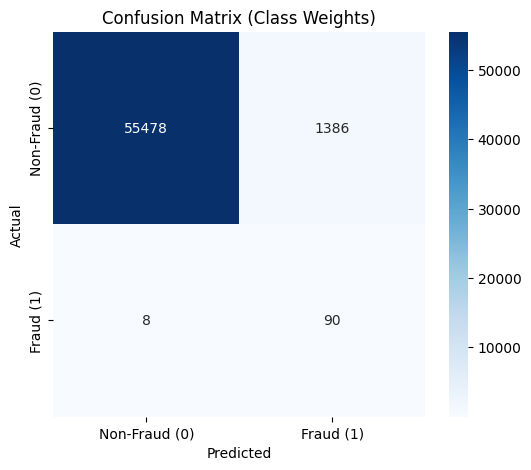

In [ ]:

cm_weighted = confusion_matrix(y_test, y_pred_weighted)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix (Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
print("\n=== Threshold ===")

y_probs = model_weighted.predict_proba(X_test)[:, 1]

threshold = 0.2
y_pred_thresh = (y_probs > threshold).astype(int)

# Evaluation
print(f"\n--- Evaluation (Custom Threshold = {threshold}) ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_thresh):.4f}")
print(f"Precision (Fraud): {precision_score(y_test, y_pred_thresh):.4f}")
print(f"Recall (Fraud): {recall_score(y_test, y_pred_thresh):.4f}")
print(f"F1-Score (Fraud): {f1_score(y_test, y_pred_thresh):.4f}")



=== Threshold ===

--- Evaluation (Custom Threshold = 0.2) ---
Confusion Matrix:
 [[51332  5532]
 [    6    92]]

Classification Report:
                precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.90      0.95     56864
    Fraud (1)       0.02      0.94      0.03        98

     accuracy                           0.90     56962
    macro avg       0.51      0.92      0.49     56962
 weighted avg       1.00      0.90      0.95     56962

Accuracy: 0.9028
Precision (Fraud): 0.0164
Recall (Fraud): 0.9388
F1-Score (Fraud): 0.0322


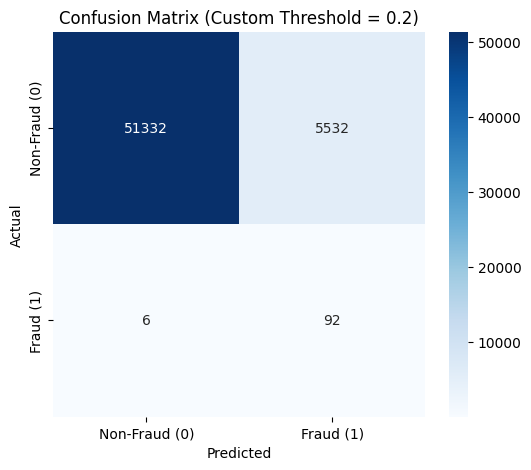

In [ ]:
# Assuming the required variables (y_test and y_pred_thresh) are available
# Get the confusion matrix for the custom threshold
cm_thresh = confusion_matrix(y_test, y_pred_thresh)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_thresh, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title(f'Confusion Matrix (Custom Threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n--- 📊 Comparison of All Models ---")

results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Fraud)', 'Recall (Fraud)', 'F1-Score (Fraud)'],

    'Original': [
        accuracy_score(y_test, y_pred_orig),
        precision_score(y_test, y_pred_orig),
        recall_score(y_test, y_pred_orig),
        f1_score(y_test, y_pred_orig)
    ],

    'Random Oversampling': [
        accuracy_score(y_test, y_pred_ros),
        precision_score(y_test, y_pred_ros),
        recall_score(y_test, y_pred_ros),
        f1_score(y_test, y_pred_ros)
    ],

    'SMOTE': [
        accuracy_score(y_test, y_pred_smote),
        precision_score(y_test, y_pred_smote),
        recall_score(y_test, y_pred_smote),
        f1_score(y_test, y_pred_smote)
    ],

    'Random Undersampling': [
        accuracy_score(y_test, y_pred_rus),
        precision_score(y_test, y_pred_rus),
        recall_score(y_test, y_pred_rus),
        f1_score(y_test, y_pred_rus)
    ],

    'Class Weights': [
        accuracy_score(y_test, y_pred_weighted),
        precision_score(y_test, y_pred_weighted),
        recall_score(y_test, y_pred_weighted),
        f1_score(y_test, y_pred_weighted)
    ],

    'Threshold = 0.2': [
        accuracy_score(y_test, y_pred_thresh),
        precision_score(y_test, y_pred_thresh),
        recall_score(y_test, y_pred_thresh),
        f1_score(y_test, y_pred_thresh)
    ]
})

(results.set_index('Metric'))



--- 📊 Comparison of All Models ---


,Original,Random Oversampling,SMOTE,Random Undersampling,Class Weights,Threshold = 0.2
Metric,,,,,,
Accuracy,0.999157,0.975545,0.974211,0.960324,0.975528,0.902777
Precision (Fraud),0.828947,0.061017,0.058027,0.038429,0.060976,0.016358
Recall (Fraud),0.642857,0.918367,0.918367,0.918367,0.918367,0.938776
F1-Score (Fraud),0.724138,0.114431,0.109157,0.073770,0.114358,0.032157


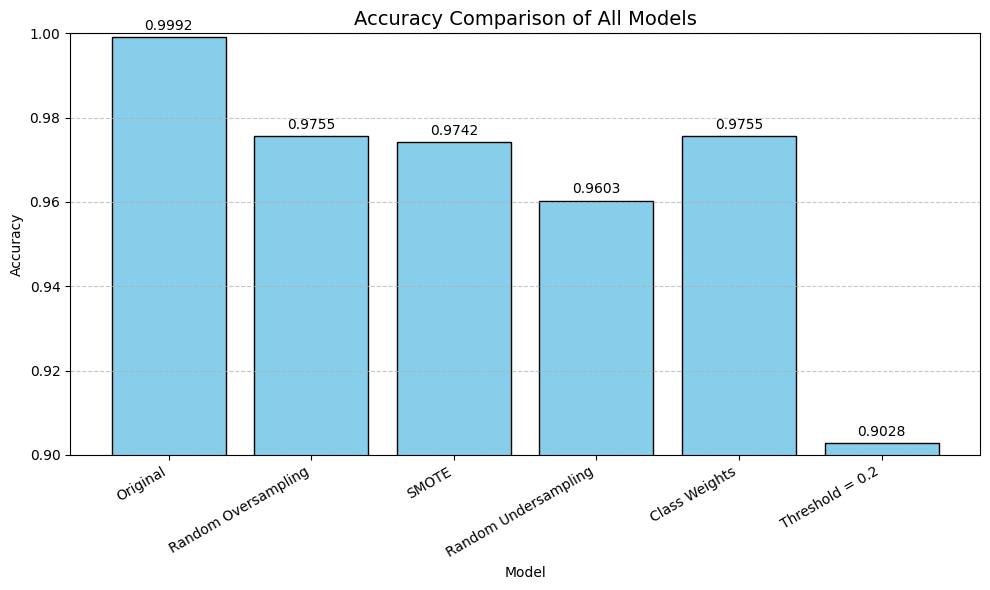

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their accuracy values
model_names = [
    'Original',
    'Random Oversampling',
    'SMOTE',
    'Random Undersampling',
    'Class Weights',
    'Threshold = 0.2'
]

accuracies = [
    accuracy_score(y_test, y_pred_orig),
    accuracy_score(y_test, y_pred_ros),
    accuracy_score(y_test, y_pred_smote),
    accuracy_score(y_test, y_pred_rus),
    accuracy_score(y_test, y_pred_weighted),
    accuracy_score(y_test, y_pred_thresh)
]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue', edgecolor='black')
plt.ylim(0.9, 1.0)  # Adjust as needed for visibility
plt.title("Accuracy Comparison of All Models", fontsize=14)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha='right')

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.001, f"{acc:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
